# Funnel Analysis

## Goal

The goal is to perform funnel analysis for an e-commerce website.
<br>
<br>
Typically, websites have a clear path to conversion: for instance, you land on the home page, then you search, select a product, and buy it. At each of these steps, some users will drop off and leave the site. The sequence of pages that lead to conversion is called 'funnel'.
<br>
<br>
Data Science can have a tremendous impact on funnel optimization. Funnel analysis allows to understand where/when our users abandon the website. It gives crucial insights on user behavior and on ways to improve the user experience. Also, it often allows to discover bugs.

## Challenge Description

You are looking at data from an e-commerce website. The site is very simple and has just 4 pages:
* The first page is the home page. When you come to the site for the first time, you can only land on the home page as a first page.
* From the home page, the user can perform a search and land on the search page.
* From the search page, if the user clicks on a product, she will get to the payment page,
where she is asked to provide payment information in order to buy that product.
* If she does decide to buy, she ends up on the confirmation page
The company CEO isn't very happy with the ]oluTe oM sales and, especially, oM sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you could suggest how conversion rate can be improved.
<br>
<br>
Specifically, she is interested in :
* A full picture of funnel conversion rate for both desktop and mobile
* Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve conversion rate.

## Data

"user_table" - info about the user
* **user_id** : the Id of the user. It is unique by user and can be joined to user id in all other tables
* **date** : the date when the user firstly landed on the site
* **device** : user device. Can be mobile or desktop
* **sex** : male/female
<br>

"home_page_table" - Users who landed on the home page
* **user_id** : the Id of the user. It is unique by user and can be joined to user id in all other tables
* **page** : it is always home_page.
<br>

"search_page_table" - Users who landed on the search_page
* **user_id** : the Id of the user. It is unique by user and can be joined to user id in all other tables
* **page** : it is always search_page
<br>

"payment_page_table" - Users who landed on the payment_page
* **user_id** : the Id of the user. It is unique by user and can be joined to user id in all other tables
* **page** : it is always payment_page
<br>

"payment_confirmation_table" - Users who landed on the payment_confirmation_table. That is, these are the users who bought the product.
* **user_id** : the Id of the user. It is unique by user and can be joined to user id in all other tables
* **page** : it is always payment_confirmation_page

===================================================================================

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from datetime import date
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder

In [50]:
import os 
os.chdir("F:/Data_Science/ProductSense_ABTesing_STATS/DS take home challenges\Dataset/5.Funnel_Analysis")

In [51]:
df1 = pd.read_csv("user_table.csv")
df2 = pd.read_csv("home_page_table.csv")
df3 = pd.read_csv("search_page_table.csv")
df4 = pd.read_csv("payment_page_table.csv")
df5 = pd.read_csv("payment_confirmation_table.csv")

## Preliminary Analysis

In [52]:
# merge datasets
data_frames = [df1, df2, df3, df4, df5]
df = reduce(lambda  left, right: pd.merge(left, right,on=['user_id'],how='outer'), data_frames)
column_names = ['user_id', 'date', 'device', 'sex', 'home page', 'search page', 'payment page', 'payment confirmation page']
df.columns = column_names
df.head()

C:\Users\LittlePigPig\AppData\Local\Temp\ipykernel_42568\1870588795.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'page_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = reduce(lambda  left, right: pd.merge(left, right,on=['user_id'],how='outer'), data_frames)


,user_id,date,device,sex,home page,search page,payment page,payment confirmation page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [53]:
# convert null/notnull to 0/1
for i in ['search page', 'payment page', 'payment confirmation page']:
    df[i] = df[i].notnull() * 1
    pass
df.head()

,user_id,date,device,sex,home page,search page,payment page,payment confirmation page
0,450007,2015-02-28,Desktop,Female,home_page,0,0,0
1,756838,2015-01-13,Desktop,Male,home_page,0,0,0
2,568983,2015-04-09,Desktop,Male,home_page,1,0,0
3,190794,2015-02-18,Desktop,Female,home_page,1,0,0
4,537909,2015-01-15,Desktop,Male,home_page,0,0,0


In [54]:
df_desktop = df[df['device'] == 'Desktop']
df_mobile = df[df['device'] == 'Mobile']

In [60]:
for i in ['search page', 'payment page', 'payment confirmation page']:
    print('For all devices, conversion rate of {:10s} is {:.2f}%'.format(i, 100 * df[i].sum() / df.shape[0]))
    print('For desktop, conversion rate of {:10s} is {:.2f}%'.format(i, 100 * df_desktop[i].sum() / df_desktop.shape[0]))
    print('For mobile, conversion rate of {:10s} is {:.2f}%'.format(i, 100 * df_mobile[i].sum() / df_mobile.shape[0]))
    print('=====================================================================================')

For all devices, conversion rate of search page is 50.00%
For desktop, conversion rate of search page is 50.00%
For mobile, conversion rate of search page is 50.00%
For all devices, conversion rate of payment page is 6.67%
For desktop, conversion rate of payment page is 5.00%
For mobile, conversion rate of payment page is 10.00%
For all devices, conversion rate of payment confirmation page is 0.50%
For desktop, conversion rate of payment confirmation page is 0.25%
For mobile, conversion rate of payment confirmation page is 1.00%


In [66]:
cvr = pd.DataFrame(columns=['home page', 'search page', 'payment page', 'payment confirmation page'], 
                    data  = [[1,0.5,0.0667,0.005], [1,0.5,0.005,0.0025], [1,0.5,0.1,0.01]], 
                    index = ['all device', 'desktop', 'mobile'])
print(cvr)

,home page,search page,payment page,payment confirmation page
all device,1,0.5,0.0667,0.0050
desktop,1,0.5,0.0050,0.0025
mobile,1,0.5,0.1000,0.0100


<AxesSubplot:>

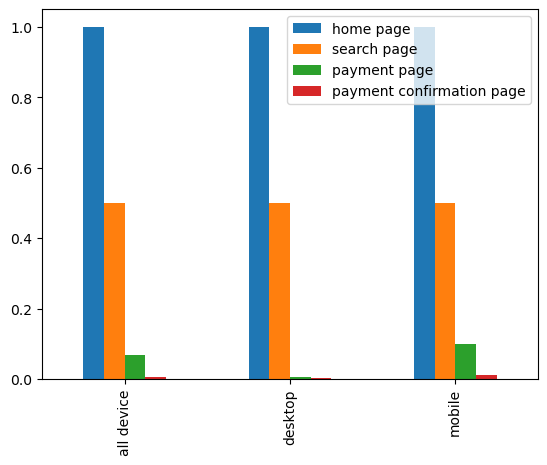

In [67]:
cvr.plot(kind = 'bar')

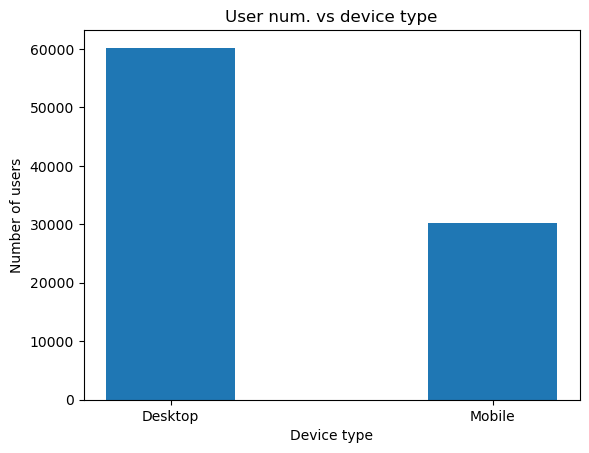

In [74]:
plt.bar(x = ['Desktop', 'Mobile'], height = [df_desktop.shape[0], df_mobile.shape[0]], width = 0.4)
plt.xlabel('Device type')
plt.ylabel('Number of users')
plt.title('User num. vs device type')
plt.show()

* The overall conversion rate of this company is 0.5% regardless of device type, which is pretty low. Basically, the average conversion rate is between 2-5% for all advertisers, from brand names to small-to-midsized businesses (SMBs), while most companies aim for a 10% (or higher) conversion rate. So the cvr of this company is far from that level. 
* Compared with mobile and desktop, the conversion rate in mobile is higher, reaching 10% while that of desktop users is only 0.5%. However, the number of desktop users is nearly twice as the number of users using mobile phone, so the product team should take a closer look at the website of the company.
* We can see that for desktop users, most of them didn't leave at the search page, so mabybe the recommending system is not working well or the layout of the products is not very appealing.

## Conversion rate of each stage

In [87]:
# write a function to calculate the conversion rate of each stage
def func_cvr(data):
    cvr = []
    column =  ['home page','search page', 'payment page', 'payment confirmation page']
    cvr.append(data[column[1]].sum() / data.shape[0])
    for i in range(2, len(column) ):
        cvr.append(data[column[i]].sum() / data[column[i-1]].sum())
    return cvr

### Device type

In [90]:
cvr_df = func_cvr(df)
cvr_df_desktop = func_cvr(df_desktop)
cvr_df_mobile = func_cvr(df_mobile)

In [99]:
cvr_device = pd.DataFrame(columns=['search page', 'payment page', 'payment confirmation page'], 
                    data  = [cvr_df, cvr_df_desktop, cvr_df_mobile], 
                    index = ['all device', 'desktop', 'mobile'])
print(cvr_device)

,search page,payment page,payment confirmation page
all device,0.5,0.133407,0.074959
desktop,0.5,0.100000,0.049834
mobile,0.5,0.200000,0.100000


<AxesSubplot:>

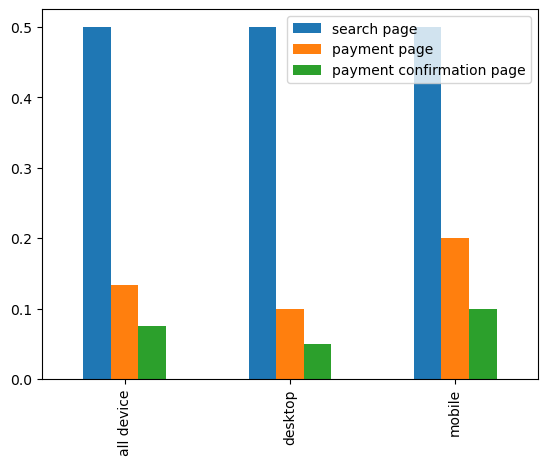

In [102]:
cvr_device.plot(kind = 'bar')

Many users churn after the search page, maybe the company should improve its recommending algorithms.

### Sex

In [103]:
cvr_f = func_cvr(df[df['sex'] == 'Female'])
cvr_m = func_cvr(df[df['sex'] == 'Male'])

In [104]:
cvr_sex = pd.DataFrame(columns=['search page', 'payment page', 'payment confirmation page'], 
                    data  = [cvr_f, cvr_m], 
                    index = ['f', 'm', ])
print(cvr_sex)

,search page,payment page,payment confirmation page
f,0.503073,0.136708,0.077742
m,0.496944,0.130083,0.072014


<AxesSubplot:>

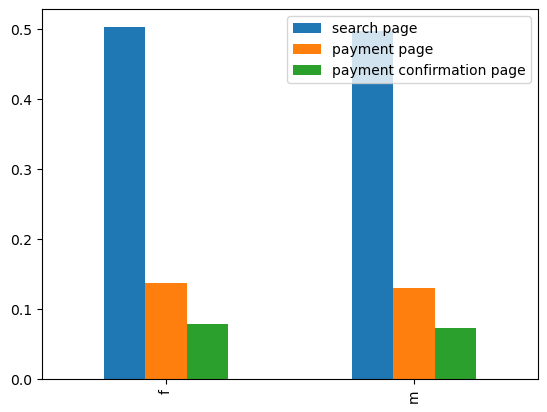

In [105]:
cvr_sex.plot(kind = 'bar')

Sex doesn't seem to be related to conversion rate. 

### Day of week

In [112]:
df['weekday'] = df['date'].apply(lambda x: pd.to_datetime(x)).dt.dayofweek        # 0 for Monday
df.head()

,user_id,date,device,sex,home page,search page,payment page,payment confirmation page,weekday
0,450007,2015-02-28,Desktop,Female,home_page,0,0,0,5
1,756838,2015-01-13,Desktop,Male,home_page,0,0,0,1
2,568983,2015-04-09,Desktop,Male,home_page,1,0,0,3
3,190794,2015-02-18,Desktop,Female,home_page,1,0,0,2
4,537909,2015-01-15,Desktop,Male,home_page,0,0,0,3


<AxesSubplot:>

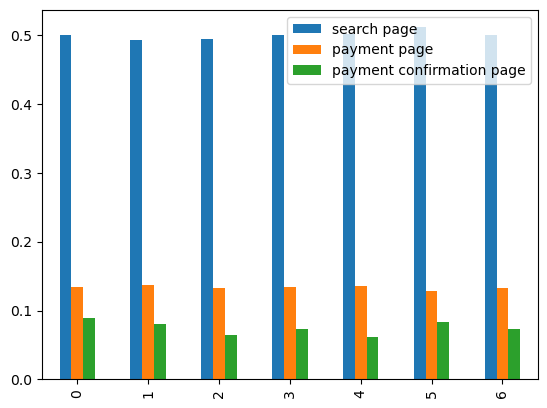

In [125]:
cvr_weekday = pd.DataFrame(df.groupby('weekday').apply(func_cvr).tolist(), columns=['search page', 'payment page', 'payment confirmation page'])
cvr_weekday.plot(kind = 'bar')    

* There is a noticeable midweek slump. 
* The conversion rate is highest on Monday, which tells us that people shopping on Monday are coming in with a greater intent to buy, so the company should focus more on potentially lucrative Mondays. \
https://richrelevance.com/2012/08/27/monday-matters-how-day-of-week-affects-online-shopping-for-four-major-retailers/

## Decision tree model

In [139]:
X = df.loc[:, ['sex', 'device', 'weekday']]
y = df['payment confirmation page']

In [146]:
X = pd.DataFrame(OrdinalEncoder().fit_transform(X), columns = ['sex', 'device', 'weekday'])
# sex: 1-Male, 0-Female; device: 1-Mobile, 0-Desktop

In [147]:
dtc = tree.DecisionTreeClassifier().fit(X, y)
print(dtc.feature_importances_)

array([0.04201375, 0.86742358, 0.09056266])

The most important feature is device. So the company should take action to improve its website to increase conversion rate. 

In [ ]:
# Visualize Decision Tree
#import graphviz
#dot_data = tree.export_graphviz(dtc, 
#                                feature_names=['sex', 'device', 'weekday'], 
#                               class_names=['0', '1'],
#                              filled=True, 
#                             rounded=True)
#graph = graphviz.Source(dot_data)
#graph